What is a tensor?

What is a matrix?

* 2D array?
* Linear map from vectors in $\mathbb{R}^n$ to $\mathbb{R}^m$ 
* Given a linear map and a basis, the coordinates in this basis are the elements of the 2D array
* Change of basis laws

Rotation example:

$$
R(\theta) = \left[\begin{array}{cc} 
cos(\theta)& -sin(\theta)\\
sin(\theta)& cos(\theta)\end{array}\right]
$$
    
If $v$ is a vector in the standard basis, and the basis is rotated by $\theta$, $v = R(\theta)^{-1} v$ in the new basis.

[[ 0 -1]
 [ 1  0]]
[[ 0.  1.]
 [-1. -0.]]


Text(0.5,1,'Rotation of coordinate basis by 90 degrees')

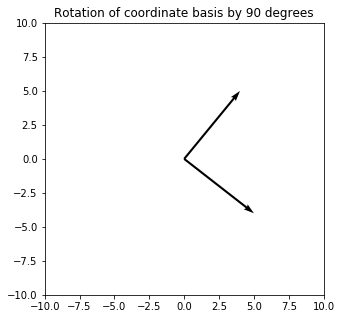

In [6]:
#\theta = 90
import numpy as np

# rotation
R = np.array([[0,-1],[1,0]])
print(R)

# inverse rotation
R_inv = np.linalg.inv(R)
print(R_inv)

# vector in the standard basis
I = np.array([[1,0],[0,1]])
v = np.array([4,5])

# coordinates of v new basis
v_rot = np.dot(R_inv, v) 


X, Y, U, V = zip([0,0,v[0],v[1]],[0,0,v_rot[0],v_rot[1]])
plt.figure(figsize = (5,5))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.title("Rotation of coordinate basis by 90 degrees")

Because vectors are tranformed by the inverse of the change of basis, they are called contravariant.

Tensors:

* Tensors are multi-linear maps

* Given a basis, they can be represented by multi-dimensional arrays

* Tensors have outer product

* Obey some coordinate tranformation laws

* Can be covariant, contravariant, or mixed tensors.

Examples:

A matrix $T$ tranforms by $R^{-1}T R$ under change of basis.

It represents 1 covariant, 1 contravariant tensor.


In many machine learning/computer vision applications tensors are usually defined simply as multidimensional arrays!
* sometimes they represent the data (no notion of a linear map)
* sometimes they represent the transformations of the data (linear map with product, but no coordinate invariance)


We need to read the definitions carefully!

### Basic operations 
 

We will use a library called [`tensorly`](http://tensorly.org/stable/index.html) to perform basic tensor operations. It allows to perform the operations efficiently by changing the backend to `MXNet` or `PyTorch`, but here we will just use the `numpy` backend.

In [7]:
import tensorly as tl

In `tensorly` you can easily convert a `numpy` array to a tensor.

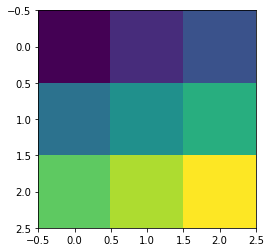

In [8]:
# creating a 3x3 array
A = np.array(range(9)).reshape((3,3))

import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(A)

In [9]:
# stack 10 A slices
T = tl.tensor(np.repeat(A,10).reshape((3,3,10)))
T.shape

(3, 3, 10)

In [10]:
# Unfolding can help visualizing tensors

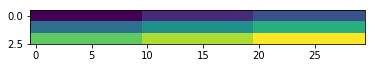

In [11]:

plt.imshow(tl.unfold(T,mode = 0).reshape((3,3*10)))

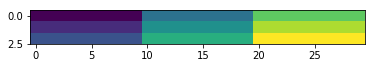

In [12]:
plt.imshow(tl.unfold(T,mode = 1))

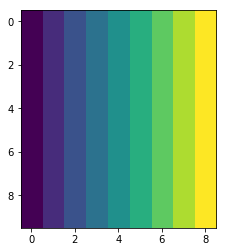

In [13]:
plt.imshow(tl.unfold(T,mode = 2))

Exercise: can you obtain something looking like a carpet of tiled magic squares?

Hint: use `np.rollaxis`

In [14]:
T = tl.tensor(np.rollaxis(np.repeat(A,10).reshape((3,3,10)),2,1))

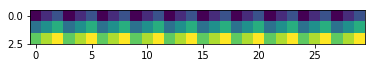

In [15]:
plt.imshow(tl.unfold(T, mode = 0))

### Tensor Product

Tensor Product:

* outer product
    * of rank one tensors
    
* n-mode product
    * tensor-matrix example (along fiber slices)

***Outer Product***
    
Given two tensors $a$ and $b$:





$a$ is a $D_1,...,D_M$ tensor

$b$ is a $D_{M+1},...,D_{M+N}$ tensor

$T = a\otimes b$  is a  $D_1,...,D_{M+N}$ tensor

$T_{D_1,...,D_{M+N}} = a_{D_1,...,D_M}*b_{D_{M+1},...,D_{M+N}}$


Example: outer product for vecors $a\in \mathbb{R}^M$ and $b\in \mathbb{R}^N$:

$a\otimes b = ab^T$ is a $M\times N$ matrix

Kronecker product returns the elements of the matrix in a vector.

In [16]:
tl.kron(tl.tensor(np.array([1,2])).T,tl.tensor(np.array([2,3])))

array([2., 3., 4., 6.])

***n-mode Product***

T - tensor $D_1,...,D_N$

A - matrix $J\times D_n$ is 

$Y = T\times_n A$ - tensor $D_1,...,D_n, J,D_{n+1},...,D_N$


$Y_{d_1,...,d_{n−1},j,d_{n+1},...,d_N} = \sum_{d_n = 1}^{D_n}T_{d_1,...,d_N}A_{j,d_n}$

In [17]:
print(T.shape)
res = tl.tenalg.mode_dot(T, np.ones((5,3)), mode=0)
res.shape

(3, 10, 3)


(5, 10, 3)

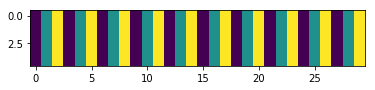

In [18]:
plt.imshow(tl.unfold(res,mode=0))

In [19]:
# 5 times the sum of the columns of A
res

array([[[ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.]],

       [[ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.]],

       [[ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.]],

       [[ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 15.],
        [ 9., 12., 

In [20]:
A


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

[Link to picture](https://github.com/JeanKossaifi/tensorly-notebooks/blob/master/01_tensor_basics/tensor_manipulation.ipynb)